# Forelesning 8: Enzymkinetikk og Newtons 2. lov

La oss se nærmere på enzymkinetikk. Vi har følgende når et substrat (S) binder seg til et enzym (E) og danner et enzym-substratkompleks (ES), og til slutt danner et produkt (P):

$$𝐸+𝑆 \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} ES \underset{k_{-2}}{\stackrel{k_2}{\rightleftharpoons}} P + E$$

Vi regner med at $k_{-2} \approx 0$

$$𝐸+𝑆 \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} ES \underset{}{\stackrel{k_2}{\rightleftharpoons}} P + E$$
$$\frac{𝑑[𝐸]}{𝑑𝑡}= −𝑘_1 [𝐸][𝑆]+𝑘_{-1} [𝐸𝑆]+𝑘_2 [𝐸𝑆]$$
$$\frac{𝑑[𝑆]}{d𝑡}=−𝑘_1 [𝐸][𝑆]+𝑘_{−1} [𝐸𝑆]$$
$$\frac{𝑑[𝐸𝑆]}{𝑑𝑡}=𝑘_1 [𝐸][𝑆]−𝑘_{−1} [𝐸𝑆]−𝑘_2 [𝐸𝑆]$$
$$\frac{𝑑[𝑃]}{𝑑𝑡}=𝑘_2 [𝐸𝑆]$$

In [7]:
import matplotlib.pyplot as plt
import numpy as np

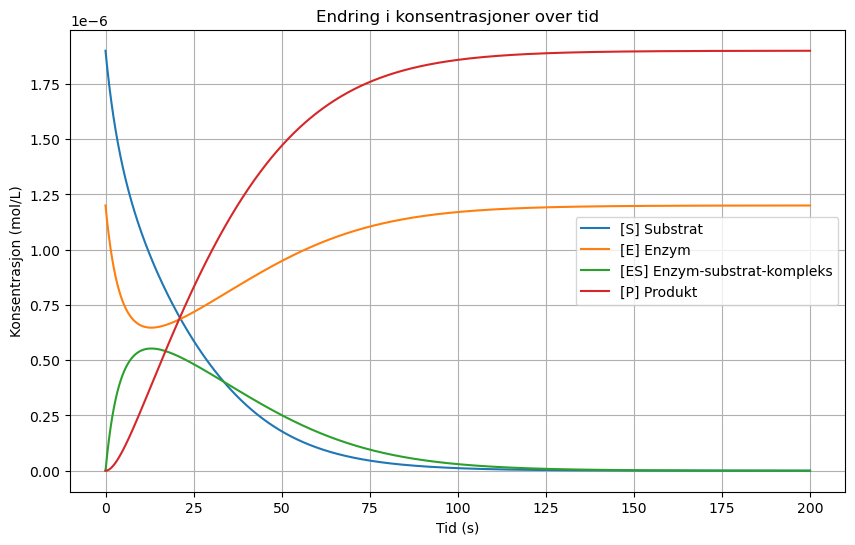

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Startbetingelser
k1 = 7.32E4
k1_back = 1.22E-2
k2 = 7.01E-2

E0 = 1.2E-6  # Startkonsentrasjon, enzym (mol/L)
S0 = 1.9E-6  # Startkonsentrasjon, substrat (mol/L)

# Tidsparametre
t0 = 0  # s
tid_slutt = 200  # s
dt = 1E-2  # s
N = int((tid_slutt - t0) / dt) + 1

# Arrayer
S = np.zeros(N)
E = np.zeros(N)
ES = np.zeros(N)
P = np.zeros(N)
t = np.zeros(N)

# Initialisere arrayene
S[0] = S0
E[0] = E0

# Integrasjonsløkke
for i in range(N - 1):
    # Fartslover
    dEdt = -k1 * E[i] * S[i] + k1_back * ES[i] + k2 * ES[i]
    dSdt = -k1 * E[i] * S[i] + k1_back * ES[i]
    dESdt = k1 * E[i] * S[i] - k1_back * ES[i] - k2 * ES[i]
    dPdt = k2 * ES[i]
    
    # Eulers metode
    E[i + 1] = E[i] + dEdt * dt
    S[i + 1] = S[i] + dSdt * dt
    ES[i + 1] = ES[i] + dESdt * dt
    P[i + 1] = P[i] + dPdt * dt
    t[i + 1] = t[i] + dt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='[S] Substrat')
plt.plot(t, E, label='[E] Enzym')
plt.plot(t, ES, label='[ES] Enzym-substrat-kompleks')
plt.plot(t, P, label='[P] Produkt')

plt.xlabel('Tid (s)')
plt.ylabel('Konsentrasjon (mol/L)')
plt.title('Endring i konsentrasjoner over tid')
plt.legend()
plt.grid(True)
plt.show()


## Fra makronivå...

### Fallende ambolt

In [14]:
# Startbetingelser
m = 30  # kg
g = 9.8 # tyngdeakselerasjon i m/s^2
k = 10   # luftmotstandskoeffisient
s = 15 # startposisjon i m
v = 0
s_slutt = 0
dt = 1E-3
t = 0

while s > s_slutt:
    F = -m*g - k*v
    a = F/m  # Newtons 2. lov
    v = v + a*dt # Eulers metode
    s = s + v*dt # Eulers metode igjen
    t = t + dt
    
print(t)

1.9369999999998975


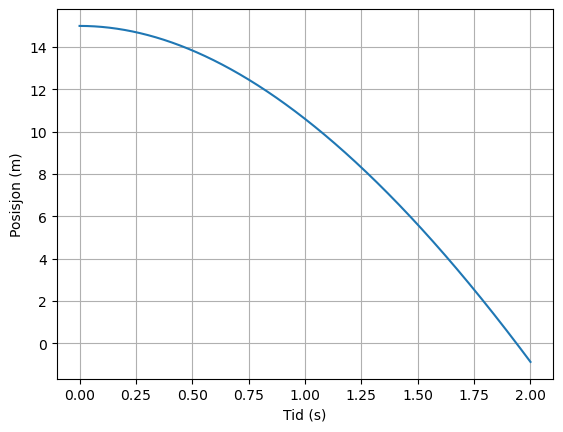

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Startbetingelser
m = 30  # kg
g = 9.8 # tyngdeakselerasjon i m/s^2
k = 10   # luftmotstandskoeffisient
s0 = 15 # startposisjon i m
v0 = 0

# tidsparametrte
dt = 1E-3
t0 = 0
tid_slutt = 2
N = int((tid_slutt - t0)/dt) + 1

# Arrayer
s = np.zeros(N)
v = np.zeros(N)
t = np.zeros(N)
s[0] = s0
v[0] = v0
t[0] = t0

# Integrasjonsløkke
for i in range(N-1):
    F = -m*g - k*v[i]
    a = F/m  # Newtons 2. lov
    # Eulers metode
    v[i+1] = v[i] + a*dt
    s[i+1] = s[i] + v[i]*dt
    # Oppdaterer tida
    t[i+1] = t[i] + dt

plt.plot(t, s)
plt.xlabel("Tid (s)")
plt.ylabel("Posisjon (m)")
plt.grid()
plt.show()


## ...til mikronivå

### En bindingsmodell


__Oppgave__: Vi kan lage bindingsmodeller som enkle "fjærmodeller". Da ser vi på atomene som kuler som henger i hver sin ende av en fjær. Dersom fjæra er stiv (høy "fjærkonstant"), vibrerer atomene mye, og motsatt. Enkle fjærkrefter følger Hooks lov:

$$F = -k\cdot (x - x_0)$$

er _x_ er posisjonen og $x_0$ er likevektsposisjonen, dvs. posisjonen der fjæra ikke er komprimert eller strukket ut. Fyll inn det som mangler i programmet nedenfor:

<iframe src="https://trinket.io/embed/python3/2d5191d8cf" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>
